# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

> [原結果]  loss: 0.0080 - accuracy: 0.9979 - val_loss: 0.1013 - val_accuracy: 0.9755<br>
> [加一層Dense] loss: 0.0108 - accuracy: 0.9965 - val_loss: 0.1163 - val_accuracy: 0.9770<br>
> 新的模型在train/val loss 些許變大, 且train/val acc 些許變小<br>
> 最後的模型準確度(model.evaluate)測試結果, 分數也是些許下降(0.9795 -> 0.9787)<br>
> <每次訓練結果可能會不太一樣, 僅針對本次訓練結果進行總結>


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#建立模型
model = Sequential()

In [8]:
#建構輸入層
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))

In [9]:
#多增加一層全連階層
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

In [10]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

# 訓練模型

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [12]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4237 - accuracy: 0.8780 - val_loss: 0.1418 - val_accuracy: 0.9557
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0956 - accuracy: 0.9695 - val_loss: 0.1107 - val_accuracy: 0.9664
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0598 - accuracy: 0.9810 - val_loss: 0.0806 - val_accuracy: 0.9741
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0410 - accuracy: 0.9870 - val_loss: 0.0972 - val_accuracy: 0.9737
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0303 - accuracy: 0.9898 - val_loss: 0.0934 - val_accuracy: 0.9747
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0242 - accuracy: 0.9920 - val_loss: 0.1002 - val_accuracy: 0.9753
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0189 - accuracy: 0.9936 - val_loss: 0.1027 - val_accuracy:

# 以圖形顯示訓練過程

In [13]:
train_history.history

{'accuracy': [0.9306041598320007,
  0.9707291722297668,
  0.979770839214325,
  0.9863125085830688,
  0.9878541827201843,
  0.9904999732971191,
  0.9927291870117188,
  0.9927291870117188,
  0.9935416579246521,
  0.995312511920929],
 'loss': [0.23526711761951447,
  0.09251910448074341,
  0.06282521784305573,
  0.04332408681511879,
  0.03572224825620651,
  0.028784070163965225,
  0.02245684526860714,
  0.02147109992802143,
  0.021158387884497643,
  0.0149394441395998],
 'val_accuracy': [0.9556666612625122,
  0.9664166569709778,
  0.9740833044052124,
  0.9736666679382324,
  0.9746666550636292,
  0.9753333330154419,
  0.9764166474342346,
  0.9794999957084656,
  0.9775833487510681,
  0.9769999980926514],
 'val_loss': [0.14176303148269653,
  0.11069745570421219,
  0.08064348250627518,
  0.09715772420167923,
  0.09337387979030609,
  0.10019169002771378,
  0.10265369713306427,
  0.10308142006397247,
  0.09377636760473251,
  0.11633621156215668]}

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

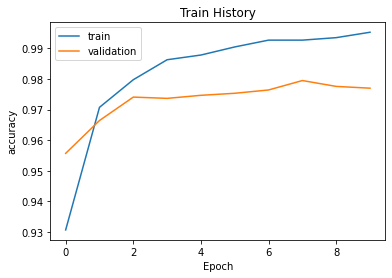

In [15]:
show_train_history(train_history,'accuracy','val_accuracy')

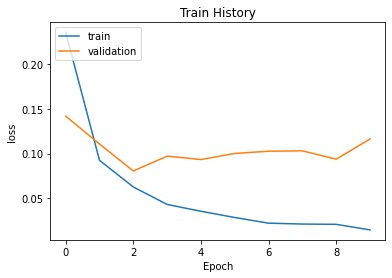

In [16]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [17]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9787

accuracy= 0.9786999821662903
